In [ ]:
import os
import os.path 
import cv2
import tkinter as tk
import tkinter.filedialog as fd
from PIL import Image
from skimage import transform, img_as_int, exposure
import skimage.io as io
import tkinter.messagebox as mb
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import blob_log, blob_doh, blob_dog
from scipy import ndimage, spatial
from cmath import inf
import sys
import numpy as np
from scipy.optimize import curve_fit
import json

In [ ]:
def find_max (x,y, arr):
    
    print(np.shape(arr))
    print((arr))
    max_elem = -1
    for i in range(x-10, x+11):
        for j in range(y-10, y+11):
            if arr[j][i] > max_elem:
                max_elem =  arr[j][i]

    list_index_max =[(i,j) for i in range(x-20, x+21)  for j in range(y-20, y+21) if arr[j][i]  == max_elem]
    line, column = list_index_max[0]
    return(line, column)
#https://www.geeksforgeeks.org/displaying-the-coordinates-of-the-points-clicked-on-the-image-using-python-opencv/  
# function to display the coordinates of  of the points clicked on the image


def click_event_FRET(event, x, y, flags, params):
    global counter
    global FRET_coord
    if event == cv2.EVENT_LBUTTONDOWN:   # checking for left mouse clicks   
        x_max,y_max = find_max(x,y,image_array_1)
        print(x_max, y_max)
        FRET_coord.append(x_max) 
        FRET_coord.append(y_max)
        cv2.circle(better_contrast_img, (x_max, y_max), 4, (0, 0, 127), 2)
        counter+=1    
    if event==cv2.EVENT_RBUTTONDOWN:
        counter = 0
        green_coord.clear()
        red_coord.clear()
        
def click_event_seq(event, x, y, flags, params):
    global counter
    global seq_coord
    if event == cv2.EVENT_LBUTTONDOWN:   # checking for left mouse clicks   
        x_max,y_max = find_max(x,y,image_array_2)
        print(x_max, y_max)
        seq_coord.append(x_max) 
        seq_coord.append(y_max)
        cv2.circle(better_contrast_img_2, (x_max, y_max), 4, (0, 0, 127), 2)
        counter+=1   
    if event==cv2.EVENT_RBUTTONDOWN:
        counter = 0
        green_coord.clear()
        red_coord.clear()


def scaling_seq (x, y):
    x = int(2329 + (x - 28522.9)/0.34)
    y = int(2042 - (y + 1313.3)/0.34)
    

    return (x,y)
    

In [ ]:
class App(tk.Tk):
    
    def __init__(self):
        super().__init__()
        btn_file = tk.Button(self, text="Choose file",
                             command=self.choose_file)
        btn_dir = tk.Button(self, text="Choose folder",
                             command=self.choose_directory)
        btn_file.pack(padx=60, pady=10)
        btn_dir.pack(padx=60, pady=10)
        

    def choose_file(self):
        filetypes = (("All formats ", "*"),
                     ("Text file", "*.txt"),
                     ("Image", "*.jpg *.gif *.png *.bmp *.tif"))
        filename = fd.askopenfilename(title="Open file", initialdir="/",
                                      filetypes=filetypes)
        if filename:
            self.st = filename
            #print (filename)
           
            
    def choose_directory(self):
        directory = fd.askdirectory(title="Open folder", initialdir="/")
        if directory:
            self.dir = directory
            print (directory)


['Pos148', 'Pos149', 'Pos150', 'Pos151', 'Pos152', 'Pos153', 'Pos154', 'Pos155', 'Pos180', 'Pos181', 'Pos182', 'Pos183', 'Pos184', 'Pos185', 'Pos186', 'Pos187', 'Pos214', 'Pos215', 'Pos216', 'Pos217', 'Pos218', 'Pos219', 'Pos220', 'Pos221', 'Pos246', 'Pos247', 'Pos248', 'Pos249', 'Pos250', 'Pos251', 'Pos252', 'Pos253', 'Pos280', 'Pos281', 'Pos282', 'Pos283', 'Pos284', 'Pos285', 'Pos286', 'Pos287', 'Pos312', 'Pos313', 'Pos314', 'Pos315', 'Pos316', 'Pos317', 'Pos318', 'Pos319', 'Pos346', 'Pos347', 'Pos348', 'Pos349', 'Pos350', 'Pos351', 'Pos352', 'Pos353', 'Pos378', 'Pos379', 'Pos380', 'Pos381', 'Pos382', 'Pos383', 'Pos384', 'Pos385', 'Pos412', 'Pos413', 'Pos414', 'Pos415', 'Pos416', 'Pos417', 'Pos418', 'Pos419', 'Pos444', 'Pos445', 'Pos446', 'Pos447', 'Pos448', 'Pos449', 'Pos450', 'Pos451', 'Pos478', 'Pos479', 'Pos480', 'Pos481', 'Pos482', 'Pos483', 'Pos484', 'Pos485']
64 2571
(256, 512)
[[247 329 155 ... 252 387 460]
 [349 349 313 ... 198 279 385]
 [249 281 194 ... 266 252 321]
 ...
 [

ValueError: cannot reshape array of size 0 into shape (2,2)

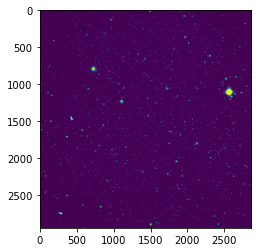

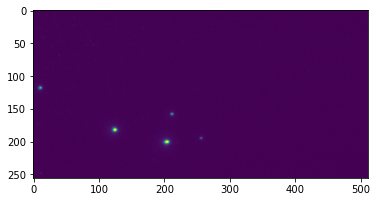

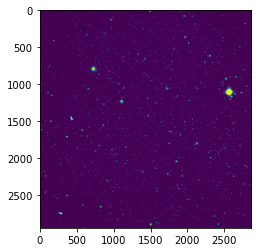

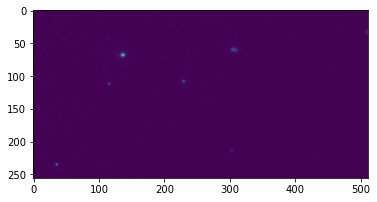

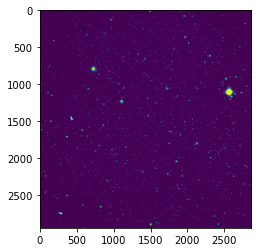

In [6]:

if __name__ == "__main__":
    
    file_path = fd.askopenfilename(title = "Choose the position list")
    current_direct = "C:/Users/panf/Documents/Muscle_intermediates/test_folder_4/"
    root = tk.Tk()
    root.attributes("-topmost", True)
    root.withdraw()

   
    pos_file = open(file_path)
    data = json.load(pos_file)
    POS = data['POSITIONS']

    labels = [P['LABEL'] for P in POS]
    posX = [P['DEVICES'][0]['X'] for P in POS]
    posY = [P['DEVICES'][0]['Y'] for P in POS]
    
    
    #X_c = [posX[i] for i,x in enumerate(labels) if labels[i]=='Pos287']
    #Y_c = [posY[i] for i,x in enumerate(labels) if labels[i]=='Pos287']
    
    labels_res = []
    posX_res = []
    posY_res = []
    for i,x in enumerate(labels):
        x = int(2329 + (posX[i] - 28522.9)/0.34)
        y = int(2042 - (posY[i] + 1313.3)/0.34)
        if (x > 0 ) and (y > 0):
            if (y+170<2866) and (x+330 < 2944) :
                labels_res.append (labels[i])
                posX_res.append (posX[i])
                posY_res.append( posY[i])
            
    
    print (labels_res)

    #print(usable_green_beads)
    #print(usable_red_beads)
    
    counter = 0           
    seq = io.imread("C:/Users/panf/Documents/Muscle_intermediates/test_folder_4/MIN_seq_stack.tif")#reading the sequence image
    seq = seq.astype("ushort") 
    plt.figure()
    plt.imshow(seq)
    for pos in labels_res :
        for current_dir,dirs, files in os.walk(current_direct) :
            for el in files:     
                if el.split('.')[-2] == pos:
                    FRET_coord = []
                    seq_coord = []
                    img1 = io.imread(current_dir + '/' + el) #reading the stack of images
                    #img1 = np.mean(img, axis = 0) #averaging by the stack
                    img1 = img1.astype("ushort") #turn from float format to ushort
                    img1 = img1 [256:512, 0:512]   
                    #img = io.imread(current_dir + '/' + el) #initial reading of original averaging image
                    #img = cv2.imread(app.st)
                    plt.figure()
                    plt.imshow(img1)
                    plt.figure()
                    plt.imshow(seq)
                    image_array_1 = np.asarray(img1) #array from FRET image
                    image_array_2 = np.asarray(seq) #array from sequence image
                    
                    X_c = [posX_res[i] for i,x in enumerate(labels_res) if labels_res[i]==pos]
                    Y_c = [posY_res[i] for i,x in enumerate(labels_res) if labels_res[i]==pos]
                    X_c, Y_c = scaling_seq(X_c[0], Y_c[0])
                    print (X_c, Y_c)
                    image_array_2 = image_array_2[ Y_c:Y_c+170, X_c:X_c+330]
  
                    #print(image_array)
                    v_min, v_max = np.percentile(image_array_1, (0.2, 99.8))
                    better_contrast_image_array = exposure.rescale_intensity(image_array_1, in_range=(v_min, v_max))
                    better_contrast_img = Image.fromarray(better_contrast_image_array)
                    better_contrast_img.save(current_dir + '/'+'better_contrast'+ pos + '.tif')
                    better_contrast_img = cv2.imread(current_dir + '/'+'better_contrast' + pos + '.tif')
                    #reading by cv2 to make possible circles in color
                    #img_jpg = io.imread('C:/Users/panf/Documents/Muscle_intermediates/AVG_G10_1_1_MMStack_Pos0.ome.jpg')
                    #img_array = img_as_int(img)
                    # displaying the image
                    # setting mouse handler for the image
                    # and calling the click_event() function
                    v_min, v_max = np.percentile(image_array_2, (0.2, 99.8))
                    better_contrast_image_array_2 = exposure.rescale_intensity(image_array_2, in_range=(v_min, v_max))
                    better_contrast_img_2 = Image.fromarray(better_contrast_image_array_2)
                    better_contrast_img_2.save(current_dir + '/'+'better_contrast'+ pos+'MIN_seq_stack.tif')
                    better_contrast_img_2 = cv2.imread(current_dir + '/'+'better_contrast' +pos+ 'MIN_seq_stack.tif')               
                    cv2.namedWindow(pos) 
                    cv2.namedWindow(pos+'_seq') 
                    cv2.setMouseCallback(pos,  click_event_FRET)
                    cv2.setMouseCallback(pos+'_seq',  click_event_seq)
                    #cv2.setMouseCallback('image1',  click_event)
                    while(1):
                        cv2.imshow(pos,better_contrast_img)
                        cv2.imshow(pos+'_seq',better_contrast_img_2)            
                        #if cv2.waitKey(20) & 0xFF == 27: #press Esc to quit
                        if cv2.waitKey(1) & 0xFF == ord('q'):
                            break                
                    cv2.destroyAllWindows()
                    if not seq_coord: 
                        seq_coord = np.reshape(seq_coord,(int((counter+1)/2), 2))
                        FRET_coord = np.reshape(FRET_coord,(int((counter+1)/2), 2))
                        result = np.concatenate ((FRET_coord, seq_coord), axis = 0)
                        np.save(pos,result)
                   

In [ ]:
print((X_c[1]))


In [ ]:

    root = tk.Tk()
    root.attributes("-topmost", True)
    root.withdraw()
    labels_res = []
    posX_res = []
    posY_res = []
    file_path = fd.askopenfilename(title = "Choose the position list", initialdir = "D:/Experiments/MUSCLE DONUTS/20220824_FC_Nano_Cas9_CCR5/parameter")
    pos_file = open(file_path)
    data = json.load(pos_file)
    POS = data['POSITIONS']

    labels = [P['LABEL'] for P in POS]
    posX = [P['DEVICES'][0]['X'] for P in POS]
    posY = [P['DEVICES'][0]['Y'] for P in POS]
    
    for i,x in enumerate(labels):
        x = int(2329 + (posX[i] - 28522.9)/0.34)
        y = int(2042 - (posY[i] + 1313.3)/0.34)
        if (x > 0 ) and (y > 0):
            if (y+170<2866) and (x+330 < 2944) :
                labels_res.append (labels[i])
                posX_res.append (posX[i])
                posY_res.append( posY[i])
    
    
    X_c = [posX[i] for i,x in enumerate(labels) if labels[i]=='Pos279']
    Y_c = [posY[i] for i,x in enumerate(labels) if labels[i]=='Pos279']
    #X_c, Y_c = scaling_seq(X_c[0], Y_c[0])

In [ ]:
print(labels_res)

In [ ]:
app_dir = "C:/Users/panf/Documents/Muscle_intermediates/test_folder_4/"
for pos in labels_res :
    for current_dir,dirs, files in os.walk(app_dir) :
        for el in files: 
            print(el.split('.')[-2])
            print(pos)
            if el.split('.')[-2] == pos:
                img1 = io.imread(current_dir + '/' + el) #reading the stack of images
                
                img1 = img1.astype("ushort") #turn from float format to ushort
                img1 = img1 [256:512, 0:512]
                plt.figure()
                plt.imshow(img1)
